# Basic information

<li>The owner has been a host since August 2010
<li>The location is lon:151.274506, lat:33.889087
<li>The current review score rating 95.0
<li>Number of reviews 53
<li>Minimum nights 4
<li>The house can accomodate 10 people.
<li>The owner currently charges a cleaning fee of 370
<li>The house has 3 bathrooms, 5 bedrooms, 7 beds.
<li>The house is available for 255 of the next 365 days
<li>The client is verified, and they are a superhost.
<li>The cancelation policy is strict with a 14 days grace period.
<li>The host requires a security deposit of $1,500

Data came from July 2018


In [1]:
# creation of Sample Customer Data later called SCD, hold as dict
from dateutil import parser

SCD_dict = {}
SCD_dict["city"] = "Bondi Beach" 
SCD_dict["longitude"] = 151.274506 
SCD_dict["latitude"] = -33.88907 
SCD_dict["review_score_rating"] = 95 
SCD_dict["number_of_reviews"] = 53 
SCD_dict["minimum_nights"] = 4 
SCD_dict["accommodates"] = 10 
SCD_dict["bathrooms"] = 3 
SCD_dict["bedrooms"] = 5
SCD_dict["beds"] = 7
SCD_dict["security_deposit"] = 1500
SCD_dict["cleaning_fee"] = 370
SCD_dict["property_Type"] = "House"
SCD_dict["room_type"] = "Entire home/apt"
SCD_dict["availability_365"] = 255
SCD_dict["host_identity_verified"] = "t" 
SCD_dict["host_is_superhost"] = "t"
SCD_dict["cancellation_policy"] = "strict_14_with_grace_period"
SCD_dict["host_since"] = parser.parser("01-08-2010") 




In [61]:
## This is simply a bit of importing logic that you don't have ..
## .. to concern yourself with for now. 
import pandas as pd 
import numpy as np 
import os 
from pathlib import Path
import re 
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt 

github_p = "https://raw.githubusercontent.com/Finance-781/FinML/master/Lecture%202%20-%20End-to-End%20ML%20Project%20/Practice/"

my_file = Path("datasets/sydney_airbnb.csv") # Defines path
if my_file.is_file():              # See if file exists
    print("Local file found")      
    df = pd.read_csv('datasets/sydney_airbnb.csv')
else:
    print("Be patient: loading from github (2 minutes)")
    df = pd.read_csv(github_p+'datasets/sydney_airbnb.csv')
    print("Done")

Be patient: loading from github (2 minutes)
Done


In [3]:
df.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'picture_url', 'host_id', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'monthly_price', 'security_deposit',
       'c

In [73]:
chosen = ["price","city","longitude","latitude","review_scores_rating","number_of_reviews","minimum_nights","security_deposit","cleaning_fee",
        "accommodates","bathrooms","bedrooms","beds","property_type","room_type","availability_365" ,"host_identity_verified", 
        "host_is_superhost","host_since","cancellation_policy"] 
df = df[chosen]

In [74]:
df.head()

,price,city,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,property_type,room_type,availability_365,host_identity_verified,host_is_superhost,host_since,cancellation_policy
0,$65.00,Potts Point,151.226562,-33.869168,92.0,177,2,NaN,NaN,1,NaN,1.0,1.0,Apartment,Private room,339,f,t,23/09/09,moderate
1,$98.00,Pyrmont,151.191896,-33.865153,95.0,468,2,$0.00,$55.00,2,1.0,1.0,1.0,Townhouse,Private room,188,t,f,14/05/09,strict_14_with_grace_period
2,$469.00,Balgowlah,151.261722,-33.800929,100.0,1,5,$900.00,$100.00,6,3.0,3.0,3.0,House,Entire home/apt,168,t,f,20/11/09,strict_14_with_grace_period
3,$63.00,Redfern,151.200450,-33.890765,89.0,172,2,NaN,NaN,2,1.0,1.0,1.0,Apartment,Private room,215,t,f,30/11/09,moderate
4,$39.00,Redfern,151.200896,-33.889667,90.0,147,2,NaN,NaN,1,2.0,1.0,1.0,Apartment,Shared room,287,t,f,30/11/09,moderate


In [75]:
df.columns

Index(['price', 'city', 'longitude', 'latitude', 'review_scores_rating',
       'number_of_reviews', 'minimum_nights', 'security_deposit',
       'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'property_type', 'room_type', 'availability_365',
       'host_identity_verified', 'host_is_superhost', 'host_since',
       'cancellation_policy'],
      dtype='object')

In [76]:
df.shape 

(27070, 20)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   27070 non-null  object 
 1   city                    27037 non-null  object 
 2   longitude               27070 non-null  float64
 3   latitude                27070 non-null  float64
 4   review_scores_rating    19512 non-null  float64
 5   number_of_reviews       27070 non-null  int64  
 6   minimum_nights          27070 non-null  int64  
 7   security_deposit        16722 non-null  object 
 8   cleaning_fee            19250 non-null  object 
 9   accommodates            27070 non-null  int64  
 10  bathrooms               27048 non-null  float64
 11  bedrooms                27062 non-null  float64
 12  beds                    27037 non-null  float64
 13  property_type           27070 non-null  object 
 14  room_type               27070 non-null

In [78]:
# Some price values are held as strings, I dont want that, i will convert those to floats using regular expression and some pandas built in function

price_list = ["price", "cleaning_fee", "security_deposit"] #columns holding such values

for col in price_list:
    df[col] = df[col].fillna("0")
    df[col] = df[col].apply(lambda x: float(re.compile('[^0-9eE.]').sub('',x)) if len(x) > 0 else 0)

In [79]:
# changing date from "host since" to datetime wchich also is hold as a string value
df['host_since'] = pd.to_datetime(df['host_since'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27070 entries, 0 to 27069
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   27070 non-null  float64       
 1   city                    27037 non-null  object        
 2   longitude               27070 non-null  float64       
 3   latitude                27070 non-null  float64       
 4   review_scores_rating    19512 non-null  float64       
 5   number_of_reviews       27070 non-null  int64         
 6   minimum_nights          27070 non-null  int64         
 7   security_deposit        27070 non-null  float64       
 8   cleaning_fee            27070 non-null  float64       
 9   accommodates            27070 non-null  int64         
 10  bathrooms               27048 non-null  float64       
 11  bedrooms                27062 non-null  float64       
 12  beds                    27037 non-null  float6

## Data exploration using box plots to check for outliers

<AxesSubplot:ylabel='price'>

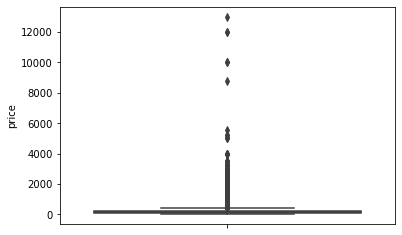

In [81]:
sns.boxplot(y = df['price'])

## Rule of thumb for skewness

<li>If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
<li>If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed.
<li>If the skewness is less than -1 or greater than 1, the data are highly skewed.

In [82]:
# Using skew to check data distribution
df['price'].skew()

13.808558337216192

Well it seems we are skewed (bad pun intended)

## Rule fo thumb for kurtosis

For kurtosis, the general guideline is that if the number is greater than +1, the distribution is too peaked. Likewise, a kurtosis of less than –1 indicates a distribution that is too flat. Distributions exhibiting skewness and/or kurtosis that exceed these guidelines are considered nonnormal

In [83]:
#Using kurtosis to check peakedness of a distribution
df['price'].kurtosis()

413.4301463784445

In [84]:
print(df['price'].quantile(0.995)) #99.5% percentile value
print(df['price'].mean())
print(df['price'].median())

1600.0
209.27879571481344
135.0


In [85]:
#Lets keep all the data rows under the 99.5% value of 1600
df = df[df["price"] < df["price"].quantile(0.995)].reset_index(drop = True)

In [86]:
df.isnull().sum()

price                        0
city                        32
longitude                    0
latitude                     0
review_scores_rating      7466
number_of_reviews            0
minimum_nights               0
security_deposit             0
cleaning_fee                 0
accommodates                 0
bathrooms                   22
bedrooms                     8
beds                        33
property_type                0
room_type                    0
availability_365             0
host_identity_verified      34
host_is_superhost           34
host_since                  34
cancellation_policy          0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26931 entries, 0 to 26930
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   price                   26931 non-null  float64       
 1   city                    26899 non-null  object        
 2   longitude               26931 non-null  float64       
 3   latitude                26931 non-null  float64       
 4   review_scores_rating    19465 non-null  float64       
 5   number_of_reviews       26931 non-null  int64         
 6   minimum_nights          26931 non-null  int64         
 7   security_deposit        26931 non-null  float64       
 8   cleaning_fee            26931 non-null  float64       
 9   accommodates            26931 non-null  int64         
 10  bathrooms               26909 non-null  float64       
 11  bedrooms                26923 non-null  float64       
 12  beds                    26898 non-null  float6

In [88]:
df['cancellation_policy'].value_counts()

strict_14_with_grace_period    11585
flexible                        8538
moderate                        6776
super_strict_60                   31
super_strict_30                    1
Name: cancellation_policy, dtype: int64

In [89]:
df['city'].value_counts()

Bondi Beach                   1671
Manly                          958
Surry Hills                    919
Bondi                          785
Randwick                       684
                              ... 
Burwood Heights                  1
norfolk rd. \nNorth Epping       1
Lalor Park                       1
Glen Alpine                      1
sydney                           1
Name: city, Length: 741, dtype: int64

In [90]:
df['property_type'].value_counts()

Apartment                 15901
House                      7722
Townhouse                  1145
Condominium                 351
Guest suite                 350
Guesthouse                  287
Villa                       201
Loft                        175
Bed and breakfast           156
Other                       147
Bungalow                    118
Cabin                        77
Serviced apartment           74
Cottage                      60
Hostel                       53
Boutique hotel               25
Boat                         18
Hotel                        13
Tent                         13
Tiny house                    9
Resort                        6
Camper/RV                     6
Island                        3
Farm stay                     3
Chalet                        2
Yurt                          2
Tipi                          2
Barn                          1
Dome house                    1
Hut                           1
Houseboat                     1
Campsite

In [91]:
df['room_type'].value_counts()

Entire home/apt    16789
Private room        9745
Shared room          397
Name: room_type, dtype: int64

In [92]:
df.describe()

,price,longitude,latitude,review_scores_rating,number_of_reviews,minimum_nights,security_deposit,cleaning_fee,accommodates,bathrooms,bedrooms,beds,availability_365
count,26931.000000,26931.000000,26931.000000,19465.000000,26931.000000,26931.000000,26931.000000,26931.000000,26931.000000,26909.000000,26923.000000,26898.000000,26931.000000
mean,196.065464,151.210438,-33.862675,93.404932,14.070031,4.482010,293.870261,65.268687,3.357395,1.340964,1.600787,1.996542,101.575916
std,199.813830,0.079425,0.071861,9.358515,29.870227,14.421896,549.642202,84.886663,2.160004,0.638187,1.091213,1.506535,127.822623
min,0.000000,150.644964,-34.135212,20.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,80.000000,151.184336,-33.897653,90.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000
50%,132.000000,151.223029,-33.883161,96.000000,3.000000,2.000000,0.000000,40.000000,2.000000,1.000000,1.000000,1.000000,32.000000
75%,225.000000,151.264706,-33.832189,100.000000,13.000000,5.000000,400.000000,99.000000,4.000000,1.500000,2.000000,2.000000,179.000000
max,1599.000000,151.339811,-33.389728,100.000000,468.000000,1000.000000,7000.000000,999.000000,16.000000,10.000000,46.000000,29.000000,365.000000


In [93]:
df.columns

Index(['price', 'city', 'longitude', 'latitude', 'review_scores_rating',
       'number_of_reviews', 'minimum_nights', 'security_deposit',
       'cleaning_fee', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'property_type', 'room_type', 'availability_365',
       'host_identity_verified', 'host_is_superhost', 'host_since',
       'cancellation_policy'],
      dtype='object')

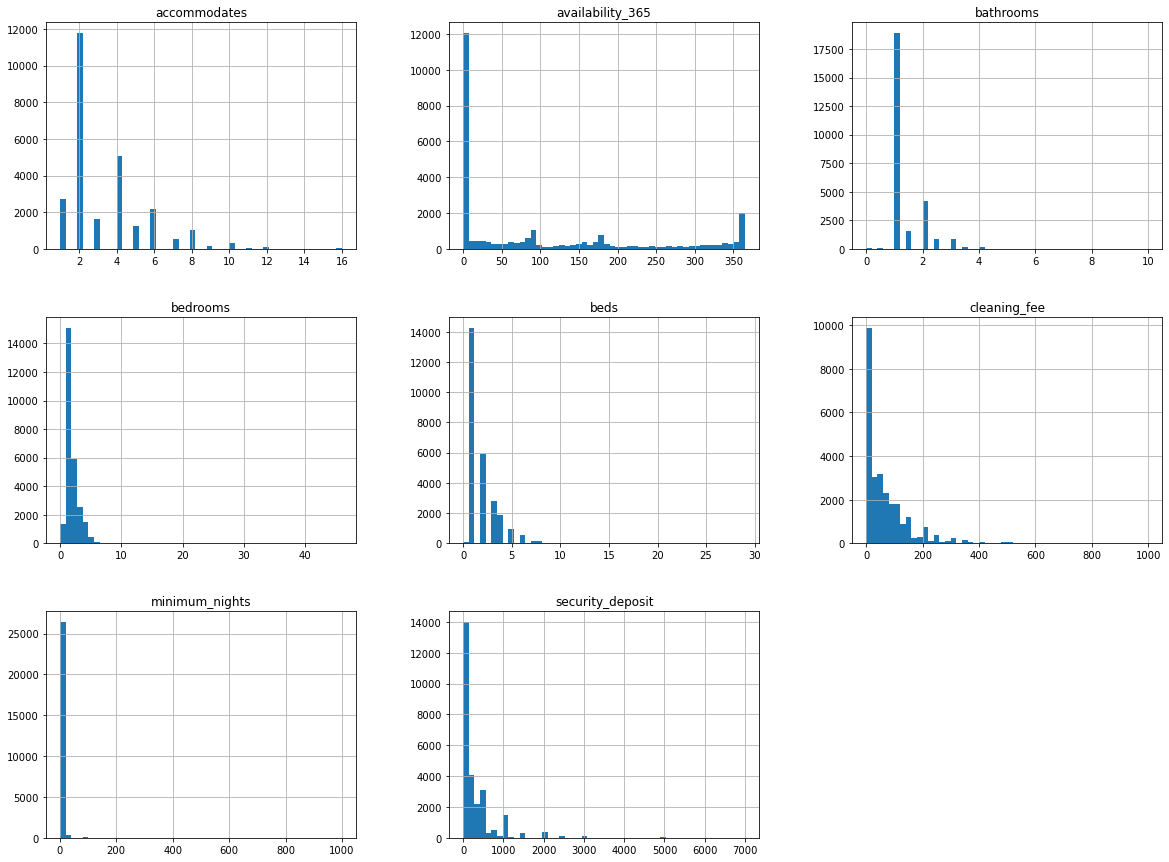

In [94]:
try:
    # We select all rows and all columns after the 6th
    df.iloc[:,6:].hist(bins=50, figsize=(20,15))
    plt.show()
except AttributeError:
    pass

<AxesSubplot:>

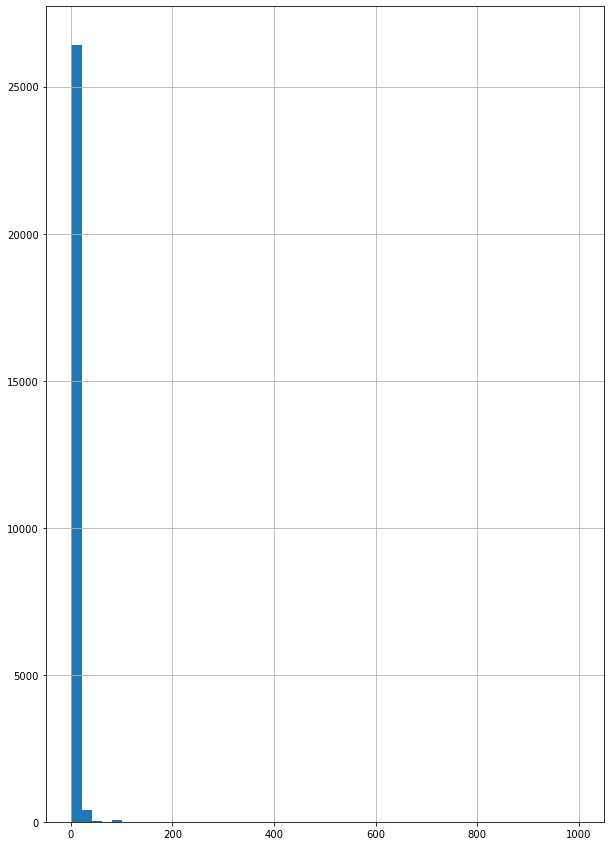

In [119]:
df['minimum_nights'].hist(bins=50,figsize=(10,15))